<a href="https://colab.research.google.com/github/justin-donnelly/Housing_Regression_Analysis/blob/main/Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import tensorflow as tf
import numpy as np

In [ ]:
def load_data():
  tarball_path = Path('datasets.housing.tgz')
  if not tarball_path.is_file():
    Path('datasets').mkdir(parents=True, exist_ok=True)
    url = 'https://github.com/ageron/data/raw/main/housing.tgz'
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path='datasets')


  return pd.read_csv(Path('datasets/housing/housing.csv'))

housing = load_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
len(housing)

20640

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing = housing.drop(columns=['longitude','latitude'])
housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.isnull().values.any()

True

This means there are some null values in total_bedrooms

In [ ]:
housing.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing['ocean_proximity'].isnull().value_counts()

False    20640
Name: ocean_proximity, dtype: int64

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

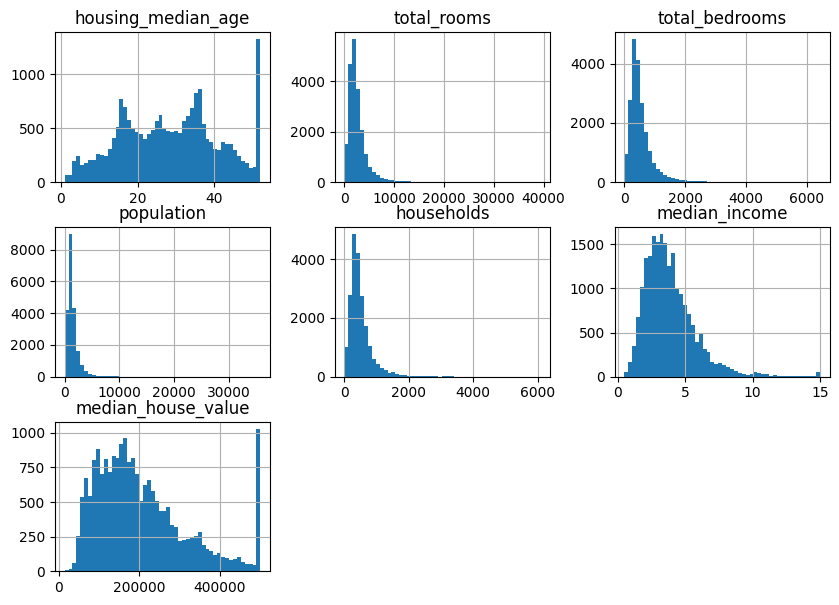

In [ ]:
housing.hist(bins=50,figsize=(10,7))

In [ ]:
corr = housing.corr()
corr['median_house_value'].sort_values(ascending=False)

<ipython-input-12-7fbc5a5514e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

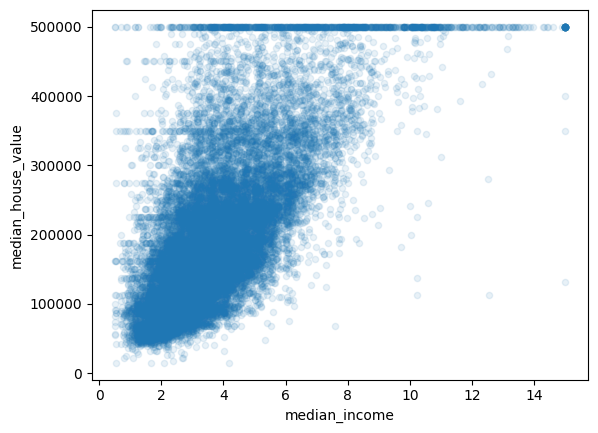

In [ ]:
housing.plot(kind='scatter', x='median_income',y = 'median_house_value', alpha=.1)

In [ ]:
housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['people_per_house'] = housing['population']/housing['households']
housing['bedrooms_per_house'] = housing['total_bedrooms']/housing['households']

In [ ]:
housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room,people_per_house,bedrooms_per_house
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1.023810
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0.971880
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1.073446
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1.073059
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1.081081


In [ ]:
corr = housing.corr()
corr['median_house_value'].sort_values(ascending=False)

<ipython-input-17-7fbc5a5514e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
bedrooms_per_house   -0.046739
bedrooms_per_room    -0.255880
Name: median_house_value, dtype: float64

In [ ]:
X = housing.drop(columns=['median_house_value'])
y= housing['median_house_value']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='mean')),
    ('standardize',StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Create column transformer
ct = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f80ec4cb370>),
                                ('pipeline-2',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f80ec4cbac0>)])

In [ ]:
X_train_normal = ct.transform(X_train)

X_test_normal = ct.transform(X_test)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(16512, 4128, 16512, 4128)

In [ ]:
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedrooms_per_room,people_per_house,bedrooms_per_house
14196,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,NEAR OCEAN,5.597948,0.185136,2.475746,1.036381
8267,10.0,901.0,163.0,698.0,167.0,4.6648,NEAR OCEAN,5.395210,0.180910,4.179641,0.976048
17445,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,NEAR BAY,4.655660,0.224924,2.004043,1.047170
14265,25.0,4021.0,634.0,2178.0,650.0,5.1663,<1H OCEAN,6.186154,0.157672,3.350769,0.975385
2271,8.0,240.0,46.0,63.0,24.0,1.4688,INLAND,10.000000,0.191667,2.625000,1.916667


In [ ]:
X_train_normal

array([[ 0.42853749,  1.57055658,  1.37478489, ...,  0.        ,
         0.        ,  1.        ],
       [-1.47350948, -0.8094394 , -0.90339975, ...,  0.        ,
         0.        ,  1.        ],
       [-0.04697426,  1.9942892 ,  2.43937961, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.99799774, -0.00537409, -0.02865375, ...,  0.        ,
         0.        ,  0.        ],
       [-0.522486  , -0.07864063,  0.03863441, ...,  0.        ,
         0.        ,  0.        ],
       [-0.522486  , -0.65590632, -0.81448326, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_normal,y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test_normal)
y_pred[:5]

array([ 62095.99351805, 252704.24435777, 394584.75376907, 292703.19999589,
       245364.79613292])

In [ ]:
y_test[:5]

20046     65600.0
3024     353400.0
15663    466700.0
20484    500001.0
9814     286100.0
Name: median_house_value, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_test, y_pred, squared=False)
lin_rmse

70423.23970053566

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)


In [ ]:
forest_reg.fit(X_train_normal,y_train)

y_pred = forest_reg.predict(X_test_normal)

forest_rmse = mean_squared_error(y_test,y_pred, squared=False)

forest_rmse

59500.864567062235

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=42,n_estimators=150, max_depth=5)

gb_reg.fit(X_train_normal,y_train)

y_pred = gb_reg.predict(X_test_normal)

gb_rmse = mean_squared_error(y_test,y_pred,squared=False)

gb_rmse

59323.05341581906

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

gb_reg_1 = make_pipeline(ct, GradientBoostingRegressor(random_state=42))

gb_rmses = -cross_val_score(gb_reg_1, X_train, y_train, scoring= 'neg_root_mean_squared_error', cv = 10)


In [ ]:
pd.Series(gb_rmses).describe()

count       10.000000
mean     59539.907655
std       1367.532647
min      58023.843471
25%      58503.932768
50%      59679.046908
75%      59987.985521
max      62634.020986
dtype: float64

In [ ]:
rf_reg_1 = make_pipeline(ct, RandomForestRegressor(random_state=42))

rf_rmses = -cross_val_score(rf_reg_1, X_train, y_train, scoring= 'neg_root_mean_squared_error', cv = 10)

In [ ]:
pd.Series(rf_rmses).describe()

count       10.000000
mean     58737.603148
std       1154.295512
min      56572.673333
25%      58320.962416
50%      58753.034874
75%      59196.882109
max      60756.751708
dtype: float64

In [ ]:
tf.random.set_seed(42)

housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

housing_model.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss= tf.keras.losses.mae,
                          metrics=['mae'])

hist = housing_model.fit(X_train_normal,y_train,epochs=150)

Epoch 1/150
516/516 [==============================] - 9s 3ms/step - loss: 153106.0469 - mae: 153106.0469
Epoch 2/150
516/516 [==============================] - 2s 3ms/step - loss: 52523.8633 - mae: 52523.8633
Epoch 3/150
516/516 [==============================] - 1s 3ms/step - loss: 48407.6055 - mae: 48407.6055
Epoch 4/150
516/516 [==============================] - 2s 4ms/step - loss: 48008.2969 - mae: 48008.2969
Epoch 5/150
516/516 [==============================] - 2s 3ms/step - loss: 47879.8945 - mae: 47879.8945
Epoch 6/150
516/516 [==============================] - 1s 3ms/step - loss: 47787.1445 - mae: 47787.1445
Epoch 7/150
516/516 [==============================] - 2s 3ms/step - loss: 47749.1328 - mae: 47749.1328
Epoch 8/150
516/516 [==============================] - 1s 3ms/step - loss: 47705.8672 - mae: 47705.8672
Epoch 9/150
516/516 [==============================] - 1s 3ms/step - loss: 47668.3828 - mae: 47668.3828
Epoch 10/150
516/516 [==============================] - 1s 3ms

In [ ]:
housing_model.evaluate(X_test_normal,y_test)

129/129 [==============================] - 0s 2ms/step - loss: 44732.7500 - mae: 44732.7500


[44732.75, 44732.75]